In [2]:
import time
import numpy as np
from pure import update as update_python
from cython1 import update as update_cython1
from cython2 import update as update_cython2
from cython3 import update as update_cython3
from cython4 import update as update_cython4

In [3]:

def initialize_lattice(lattice_size=300):
    """ 
    Function to initialize the lattice state for testing
    """
    # Initialize a lattice as a cross
    lattice = np.zeros((lattice_size, lattice_size), dtype=int)
    lattice[lattice_size // 2, :] = 1
    lattice[:, lattice_size // 2] = 1
    return lattice

In [4]:
def test_performance(update_function, lattice_size=300, iterations=300):
    lattice = initialize_lattice(lattice_size)
    start_time = time.time()
    for _ in range(iterations):
        lattice = update_function(lattice)
    end_time = time.time()

    return end_time - start_time

In [5]:
cpython_runtime = test_performance(update_python)
cython_1_runtime = test_performance(update_cython1)
cython_2_runtime = test_performance(update_cython2)
cython_3_runtime = test_performance(update_cython3)
cython_4_runtime = test_performance(update_cython4)

In [6]:
cpython_runtime

6.898137807846069

In [7]:
cython_1_runtime

6.241802930831909

In [8]:
cython_2_runtime

2.912992000579834

In [10]:
cython_3_runtime

2.3768460750579834

In [11]:
cython_4_runtime

1.8776521682739258

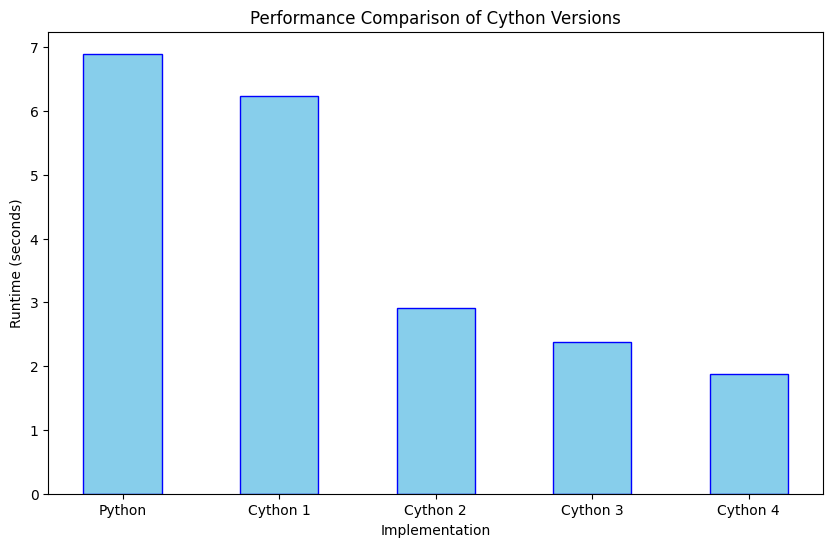

In [9]:
import matplotlib.pyplot as plt

# Data preparation
labels = ['Python','Cython 1', 'Cython 2', 'Cython 3', 'Cython 4']
runtimes = [cpython_runtime, cython_1_runtime, cython_2_runtime, cython_3_runtime, cython_4_runtime]

# Creating the bar chart
plt.figure(figsize=(10, 6))
plt.bar(labels, runtimes, width=0.5, color='skyblue', edgecolor='blue')
plt.xlabel('Implementation')
plt.ylabel('Runtime (seconds)')
plt.title('Performance Comparison of Cython Versions')
plt.show()

In [13]:
import plotly.graph_objs as go

# Data preparation
labels = ['Python','Cython 1', 'Cython 2', 'Cython 3', 'Cython 4']
runtimes = [cpython_runtime, cython_1_runtime, cython_2_runtime, cython_3_runtime, cython_4_runtime]
colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon', 'lightblue']

# Creating the bar chart
fig = go.Figure(data=[go.Bar(x=labels, y=runtimes, marker_color=colors)])
fig.update_layout(
    title='Performance results',
    yaxis_title='Runtime (seconds)',
    width=800,
    height=500
)
fig.show()
